In [42]:
## INPUT
name="RiseOfTiamat"

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import datetime
%matplotlib inline

skill_labels=['ACROBATICS',
 'ANIMAL HANDLING',
 'ARCANA',
 'ATHLETICS',
 'DECEPTION',
 'HISTORY',
 'INSIGHT',
 'INTIMIDATION',
 'INVESTIGATION',
 'MEDICINE',
 'NATURE',
 'PERCEPTION',
 'PERFORMANCE',
 'PERSUASION',
 'RELIGION',
 'SLEIGHT OF HAND',
 'STEALTH',
 'SURVIVAL']

attr_labels=['STRENGTH',
 'DEXTERITY',
 'CONSTITUTION',
 'INTELLIGENCE',
 'WISDOM',
 'CHARISMA']

save_labels=['STRENGTH SAVE',
 'DEXTERITY SAVE',
 'CONSTITUTION SAVE',
 'INTELLIGENCE SAVE',
 'WISDOM SAVE',
 'CHARISMA SAVE',
 'DEATH SAVE']

df=pd.read_csv("rolls_"+name+".csv",sep=";")
df["Timestamp"]=pd.to_datetime(df["Timestamp"])
df["Day"]=pd.to_datetime(df["Day"])

skills=df[df["Type"]=="Skill"].rename(columns={"Skill/Weapon/Spell": "Skill"})
attacks=df[df["Type"]=="Attack"].rename(columns={"Skill/Weapon/Spell": "Weapon/Spell"})
saves=df[df["Type"]=="Save"].rename(columns={"Skill/Weapon/Spell": "Save"})
other=df[df["Type"]=="Other"].rename(columns={"Skill/Weapon/Spell": "Skill"})

plyr_labels=list(set(df["Player"]))

df

,Player,Timestamp,Skill/Weapon/Spell,Result,Raw,Plus,Final,Type,Day
0,Gruumsh,2020-04-19 19:09:00,PERSUASION,24,18,6,1.0,Skill,2020-04-19
1,Gruumsh,2020-04-19 19:09:00,PERSUASION,23,17,6,0.0,Skill,2020-04-19
2,Gruumsh,2020-04-19 20:24:00,INVESTIGATION,10,11,-1,1.0,Skill,2020-04-19
3,Gruumsh,2020-04-19 20:24:00,INVESTIGATION,0,1,-1,0.0,Skill,2020-04-19
4,Ylva,2020-04-19 20:34:00,PERCEPTION,25,19,6,1.0,Skill,2020-04-19
...,...,...,...,...,...,...,...,...,...
2413,Ylva,2020-12-11 22:22:00,HISTORY,21,16,5,1.0,Skill,2020-11-12
2414,Parun,2020-12-11 22:34:00,INSIGHT,19,10,9,1.0,Skill,2020-11-12
2415,Parun,2020-12-11 22:34:00,INSIGHT,16,7,9,1.0,Skill,2020-11-12
2416,Ylva,2020-12-11 22:39:00,INSIGHT,11,8,3,1.0,Skill,2020-11-12


In [27]:
print(df[df["Raw"]>20].shape)
df=df[df["Raw"]<=20]

(0, 9)


## Skillchecks

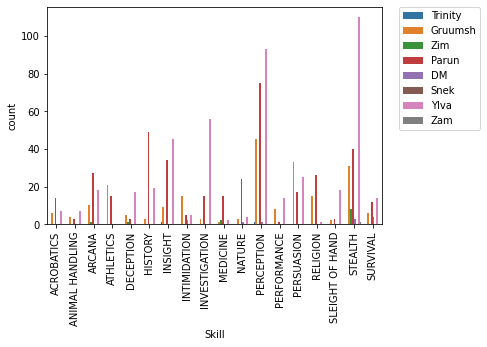

In [44]:
ax = sns.countplot(x="Skill", hue="Player", data=skills[skills["Final"]==1], order=skill_labels,hue_order=plyr_labels)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Count of skillchecks per month and player

In [30]:
#skills['Timestamp'].groupby([skills.Timestamp.dt.year, skills.Timestamp.dt.month, skills.Player,df.Final]).agg('count')

Average plusses on skillchecks

## Distribution of rolls

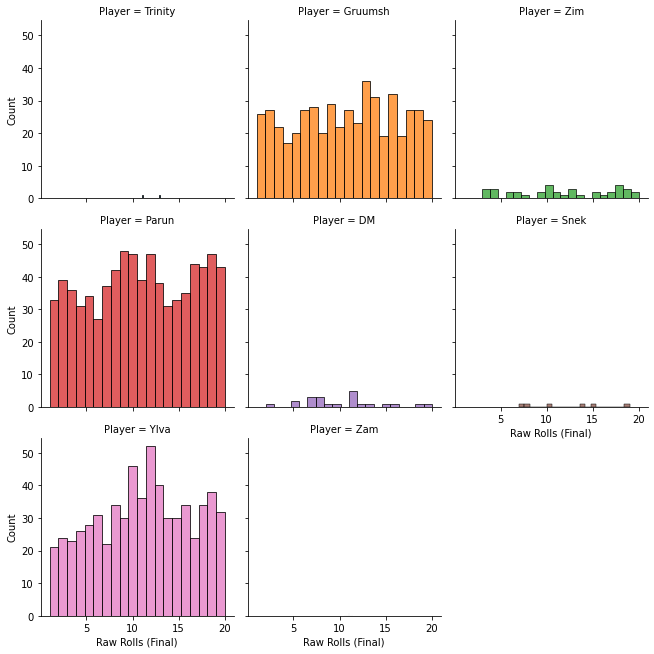

In [45]:
g = sns.FacetGrid(df[df["Final"]==1],col="Player",hue="Player",col_wrap=3,col_order=plyr_labels,hue_order=plyr_labels)
g.map_dataframe(sns.histplot, x="Raw",bins=20)
g.set_axis_labels("Raw Rolls (Final)", "Count")

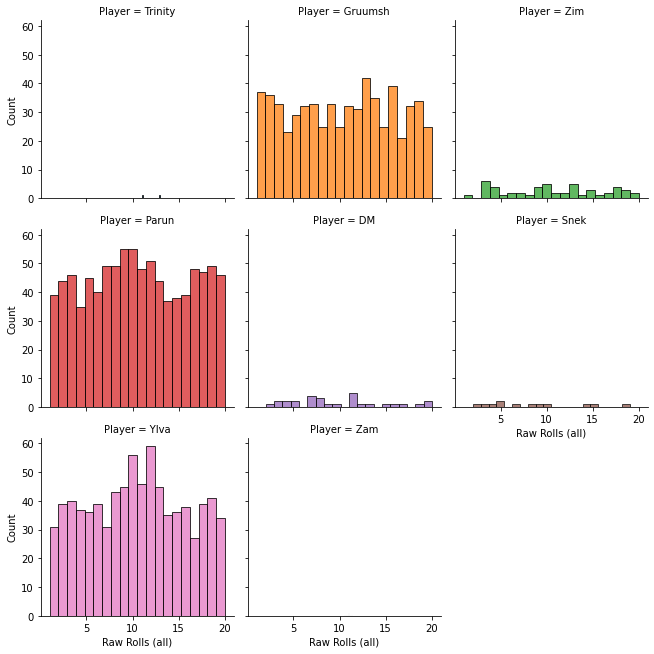

In [46]:
g = sns.FacetGrid(df,col="Player",hue="Player",col_wrap=3,col_order=plyr_labels,hue_order=plyr_labels)
g.map_dataframe(sns.histplot, x="Raw",bins=20)
g.set_axis_labels("Raw Rolls (all)", "Count")

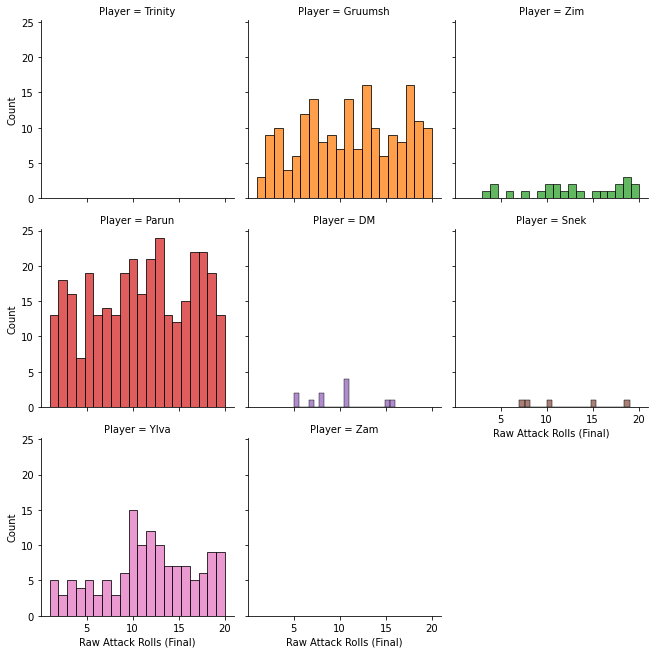

In [47]:
g = sns.FacetGrid(attacks[attacks["Final"]==1],col="Player",hue="Player",col_wrap=3,col_order=plyr_labels,hue_order=plyr_labels)
g.map_dataframe(sns.histplot, x="Raw",bins=20)
g.set_axis_labels("Raw Attack Rolls (Final)", "Count")

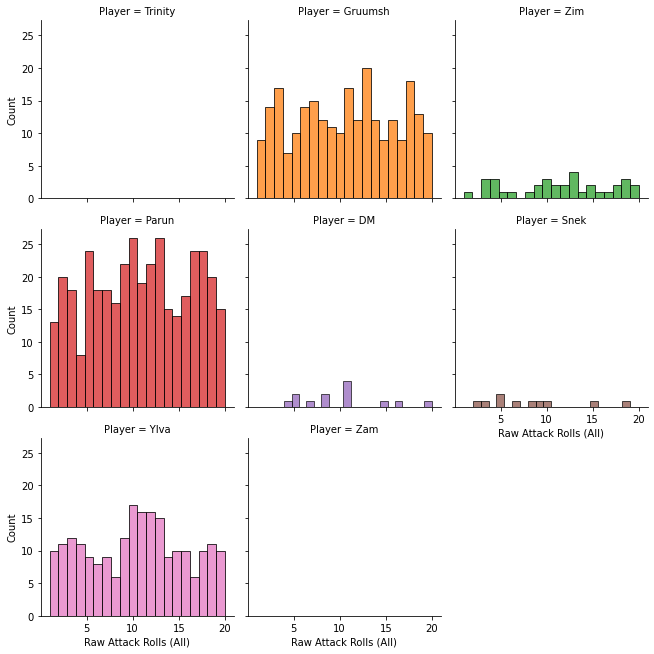

In [48]:
g = sns.FacetGrid(attacks,col="Player",hue="Player",col_wrap=3,col_order=plyr_labels,hue_order=plyr_labels)
g.map_dataframe(sns.histplot, x="Raw",bins=20)
g.set_axis_labels("Raw Attack Rolls (All)", "Count")

In [49]:
df['Raw'].groupby([df.Player]).agg('mean')

Player
DM          9.793103
Gruumsh    10.374598
Parun      10.605088
Snek        8.416667
Trinity    12.000000
Ylva       10.506901
Zam        11.000000
Zim        10.764706
Name: Raw, dtype: float64

In [50]:
df['Raw'].groupby([df.Player]).agg('std')

Player
DM         5.143507
Gruumsh    5.784609
Parun      5.680494
Snek       5.264950
Trinity    1.414214
Ylva       5.510293
Zam             NaN
Zim        5.569877
Name: Raw, dtype: float64

## Crits

In [51]:
crits20=df[(df["Raw"]==20)]
crits1=df[(df["Raw"]==1)]

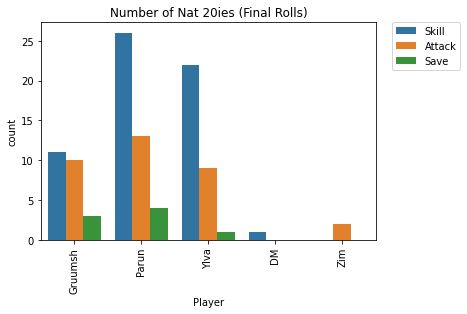

In [52]:
ax = sns.countplot(x="Player",hue="Type", data=crits20[crits20["Final"]==1])
plt.xticks(rotation=90)
plt.title("Number of Nat 20ies (Final Rolls)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

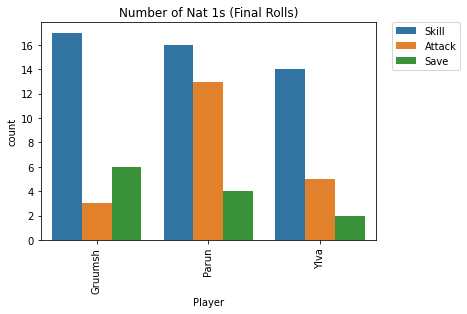

In [54]:
ax = sns.countplot(x="Player",hue="Type", data=crits1[crits1["Final"]==1])
plt.xticks(rotation=90)
plt.title("Number of Nat 1s (Final Rolls)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Saves

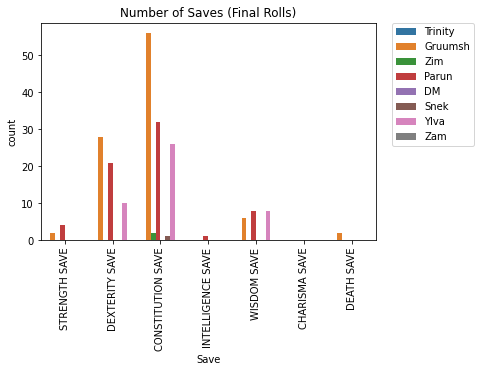

In [55]:
ax = sns.countplot(x="Save",hue="Player", data=saves[saves["Final"]==1],hue_order=plyr_labels,order=save_labels)
plt.xticks(rotation=90)
plt.title("Number of Saves (Final Rolls)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Times

In [21]:
#df[["Timestamp"]].groupby([df["Day"]]).agg(lambda x: max(x.Timestamp)-min(x.Timestamp))

In [22]:
times=df[["Timestamp"]].groupby([df["Day"]]).agg(lambda x: max(x.Timestamp)-min(x.Timestamp))
len(times[times.Timestamp>datetime.timedelta(hours=2)])

5

## Attacks

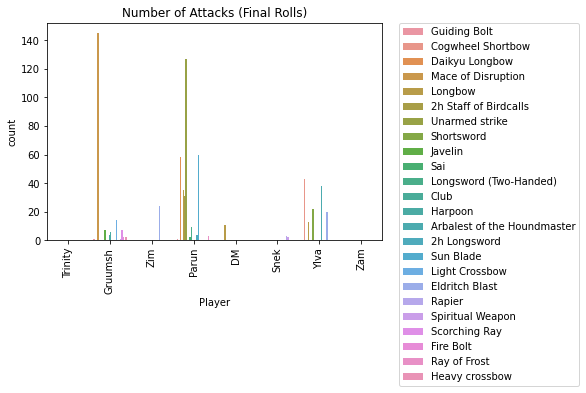

In [56]:
ax = sns.countplot(x="Player",hue="Weapon/Spell", data=attacks[attacks["Final"]==1],order=plyr_labels)
plt.xticks(rotation=90)
plt.title("Number of Attacks (Final Rolls)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)